# Section 2.1 - The Bisection Method

We will begin by importing the appropriate python libraries.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Coding the Bisection Method

Write out the pseudo code

Consider various stopping criteria:
1. $\vert p_n - p_{n-1}\vert < \epsilon$  This is simply implemented via the code `np.abs(p - p0)`
2. $\vert p_n - p_{n-1}\vert/\vert p_{n-1}\vert < \epsilon$, $p_{n-1} \neq 0$ Should $p_{n-1} = 0$, 
3. $\vert p_n - p_{n-1}\vert < \epsilon$
   

In [5]:
def bisection_method(a,b,f,tol,N):
    
    FA,FB = f(a),f(b)           # Determine f(a) and f(b)
    
    if  b<a:
        print("ERROR: Please ensure that a<b for your initial interval [a,b].")
    elif(FA*FB>0):              # determine if there is a root within the interval [a,b]
        print("ERROR: Cannot ensure existence of root within the interval.  Please change the initial interval [a,b].")
    else: 
        p = (a + b)/2                            # define the mid-point
        pOut = [p]
        FP = f(p)                                # Evaluate the function at the mid-point
        p0 = p;
        
            
        error = 1                                # set the initial error to 1.
        n = 0                                    # set the initial iteration count to be 0

        print(" n           a             b                p                 error           |f(p)|           ")
        print("-----------------------------------------------------------------------------------------------")
        print("% 3.d    % 10.5f    % 10.5f    % 10.16f    % 10.5e    % 10.5e"    % (n, a, b,p,error,np.abs(FP)))

        
        while (error>tol)&(n<=N-1):
            n=n+1
            
            if FA*FP<0:
                b = p
                FB = FP
            else:
                a = p
                FA = FP
            p = (a + b)/2
            pOut.append(p)
            FP = f(p)
            error = np.abs(p - p0)/(np.abs(p0) + 1 - (np.abs(p0)>0))
            p0 = p;
            print("% 3.d    % 10.5f    % 10.5f    % 10.16f    % 10.5e    % 10.5e" % (n, a, b,p,error,np.abs(FP)))
            
        if error>tol: # Check to see if you 
            print("\n ERROR: Method failed to converge.  Please increase the maximum number of iterations or decrease the tolerance.")
        else:
            print("\n Success! The method converged in ",n," iterations to the root p = ",p)
            return pOut
            
        

## Example 1: Testing the Bisection Method on $3^{-x} - x = 0$
We now consider the testing the bisection method to solve the equation 
\begin{align}
    &3^{-x} - x = 0\\
    &f(x)= 0
    \end{align}
First, we will define the function $f(x)$ via the command 
```
    f = lambda x: 3**(-x)-x
```

In [6]:
f = lambda x: 3**(-x)-x

The code below generates a plot of the function $f(x)$ where it is possible to see the root occuring withing the interval $\left[0,1\right]$

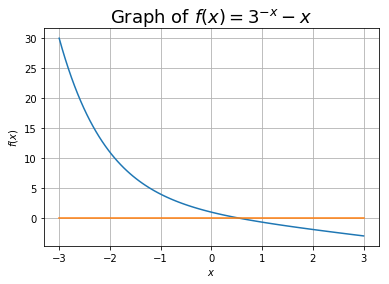

In [7]:
xval = np.linspace(-3,3,100)    # create an array of x-values on [-3,3] using 100 equally spaced points
y = f(xval)                     # create an array of y-values where y = f(x)
plt.plot(xval,y)                # plot the graph y = f(x)
plt.plot(xval,0*xval)           # plot the graph y = 0 to show clear intersections

# Label the graph, and show grids
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Graph of $f(x) = 3^{-x} - x$",fontsize=18)
plt.grid()

In [22]:
pOut = bisection_method(-1,1,f,1e-10,40)

 n           a             b                p                 error           |f(p)|           
-----------------------------------------------------------------------------------------------
  0      -1.00000       1.00000     0.0000000000000000     1.00000e+00     1.00000e+00
  1       0.00000       1.00000     0.5000000000000000     5.00000e-01     7.73503e-02
  2       0.50000       1.00000     0.7500000000000000     5.00000e-01     3.11309e-01
  3       0.50000       0.75000     0.6250000000000000     1.66667e-01     1.21732e-01
  4       0.50000       0.62500     0.5625000000000000     1.00000e-01     2.34621e-02
  5       0.50000       0.56250     0.5312500000000000     5.55556e-02     2.66153e-02
  6       0.53125       0.56250     0.5468750000000000     2.94118e-02     1.49579e-03
  7       0.54688       0.56250     0.5546875000000000     1.42857e-02     1.10032e-02
  8       0.54688       0.55469     0.5507812500000000     7.04225e-03     4.75873e-03
  9       0.54688       0

In [23]:
pOut2 = np.asarray(pOut)

In [30]:
pOut2[1:]-pOut2[0:-1]

array([ 5.00000000e-01,  2.50000000e-01, -1.25000000e-01, -6.25000000e-02,
       -3.12500000e-02,  1.56250000e-02,  7.81250000e-03, -3.90625000e-03,
       -1.95312500e-03, -9.76562500e-04, -4.88281250e-04,  2.44140625e-04,
        1.22070312e-04,  6.10351562e-05,  3.05175781e-05, -1.52587891e-05,
        7.62939453e-06, -3.81469727e-06, -1.90734863e-06,  9.53674316e-07,
       -4.76837158e-07,  2.38418579e-07,  1.19209290e-07,  5.96046448e-08,
        2.98023224e-08,  1.49011612e-08, -7.45058060e-09, -3.72529030e-09,
        1.86264515e-09, -9.31322575e-10, -4.65661287e-10,  2.32830644e-10,
       -1.16415322e-10, -5.82076609e-11,  2.91038305e-11])